
$$MASTER\ DATA \ ANALITYCS \ UVG "$$
$$Carlos \ Manuel \ Boche \ Leonardo$$
$$201557$$ $$ $$







<div align="center">

    
   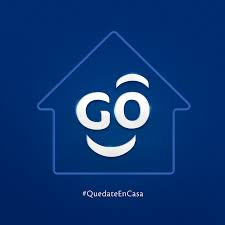
    
<img src="https://www.uvg.edu.gt/wp-content/uploads/socialshare-logo.jpg"  style="width: 72px; height: 72px; margin: 0px;">    
    
</div>




$$ Analisis \ de\  los \ resultados \ de \  Evaluaciones  $$ $$ \ de $$ $$\ los  \ Graduandos  \ establecimiento \ nivel \ medio \ Guatemala \ 2017  $$




Los archivos analizados se obtuvieron en la siguiente pagina. __[web oficial](http://www.datos.gob.gt/dataset/resultados_de_aprendizaje)__.







Analizaremos en que departamento se tiene mejor porcentaje en las materias evaluadas (LECTURA , MATEMATICA) como tambien analizaremos si en ese departamento el mayor porcentaje
de Exito .



El archivo con que trabajaremos contiene 121 columnas con distintos registros, nuevamente realizaremos separaron en 2 grupos basicos. En donde el primer grupo estaran los datos caracteristicos y en el segundo grupo los datos porcentuales.


- Datos

  - Departamento del Establecimiento
  - Sector del Establecimiento
  - Área del establecimiento
  - Edad promedio de los Estudiantes del Establecimiento
  - Total de Estudiantes Evaluados en el Establecimiento

- KPI
   - % de Estudiantes del Establecimiento en el nivel de desempeño Insatisfactorio en Lectura - 2017
   - % de Estudiantes del Establecimiento en el nivel de desempeño Satisfactorio en Matemática - 2017
   - % de Estudiantes del Establecimiento en el nivel de desempeño Satisfactorio en Lectura - 2017
   - % de Estudiantes del Establecimiento en el nivel de desempeño Insatisfactorio en Matemática - 2017
   - No Logro del Establecimiento en Lectura 2017
   - No Logro del Establecimiento en Matemática 2017
   - Departamento del Establecimiento
 
 
 El campo Departamento del Establecimiento lo utilizaremos para relacionar los campos datos con los KPI
  
 Nota: se tuvieron que cambiar los nombres de las columnas por algun motivo los nombres grandes me estaban provocando problema al momento de realizar la parte de las regresion lineal.
 los nombres que se dejaron fueron los siguientes.
 
 - Sector del Establecimiento 	
 - Área del establecimiento 	
 - Total_Estudiantes 	
 - Logro_Lectura_2017 	
 - Logro_Matemática_2017 	
 - Edad_promedio 	
 - Departamento

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
arch_= pd.read_csv('../data/data2.csv', index_col=0, skiprows=1)
col_names = arch_.columns
col_names
arch_.head()

,Sector del Establecimiento,Área del establecimiento,Total_Estudiantes,Logro_Lectura_2017,Logro_Matemática_2017,Edad_promedio,Departamento
Código del Establecimiento,,,,,,,
00-01-0158-46,Privado,Urbana,12,41.67,0.00,18.33,Ciudad Capital
00-01-0173-46,Oficial,Urbana,97,27.84,1.03,18.26,Ciudad Capital
00-01-0174-46,Oficial,Urbana,177,16.38,0.56,17.97,Ciudad Capital
00-01-0176-46,Oficial,Urbana,160,23.75,10.00,16.88,Ciudad Capital
00-01-0178-46,Oficial,Urbana,34,2.94,2.94,23.29,Ciudad Capital


La etiqueta de Ciudad Capital por Guatemala asi estandarizamos a solo nombres de departamentos 

In [2]:
arch_["Departamento"] = arch_.Departamento.replace({"Ciudad Capital" : "Guatemala"})
arch_.head()

,Sector del Establecimiento,Área del establecimiento,Total_Estudiantes,Logro_Lectura_2017,Logro_Matemática_2017,Edad_promedio,Departamento
Código del Establecimiento,,,,,,,
00-01-0158-46,Privado,Urbana,12,41.67,0.00,18.33,Guatemala
00-01-0173-46,Oficial,Urbana,97,27.84,1.03,18.26,Guatemala
00-01-0174-46,Oficial,Urbana,177,16.38,0.56,17.97,Guatemala
00-01-0176-46,Oficial,Urbana,160,23.75,10.00,16.88,Guatemala
00-01-0178-46,Oficial,Urbana,34,2.94,2.94,23.29,Guatemala


In [3]:
arch_.describe()

,Total_Estudiantes,Logro_Lectura_2017,Logro_Matemática_2017,Edad_promedio
count,4124.000000,4124.000000,4124.000000,4124.000000
mean,38.545587,12.259091,3.015206,19.434692
std,68.997131,11.390440,6.120236,2.861703
min,1.000000,0.000000,0.000000,15.330000
25%,10.000000,3.450000,0.000000,17.700000
50%,21.000000,11.110000,0.000000,18.390000
75%,45.000000,18.180000,4.000000,20.132500
max,2075.000000,100.000000,100.000000,48.000000


Sacando los datos descriptivos de nuestros dos Grupos de datos nos damos cuenta de varios datos alarmantes.

  - 1.
Nuestra poblacion estudiantil a nivel medio se gradua siendo mayor de edad
  - 2.
Por establecimiento la cantidad de alumnos es muy baja habiendo un establecimiento que reporto unicamente 1 alumno graduando
  - 3.
El promedio de aprobacion es muy bajo, 12% en Lectura y 3 % en matematicas

 


  ### En este punto se toma la decision de no elimiar los datos que eran 0 porque muy probablemente esa fue la nota real del establecimiento (algo realmente alarmante)

Graficaremos cada uno de los puntos anteriores para confirmar los datos obtenidos.

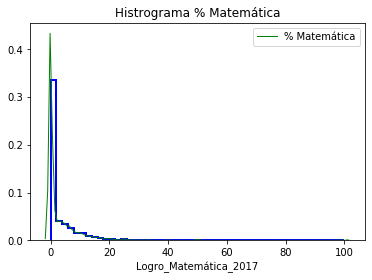

In [4]:
(sns.distplot(arch_["Logro_Matemática_2017"], 
              rug_kws={"color": "y"},
              kde_kws={"color": "green", "lw": 1, 
                       "label": "% Matemática"},
              hist_kws={"histtype": "step", "linewidth": 2,
                        "alpha":1 , "color": "b"})
.set_title("Histrograma % Matemática"))
plt.show()

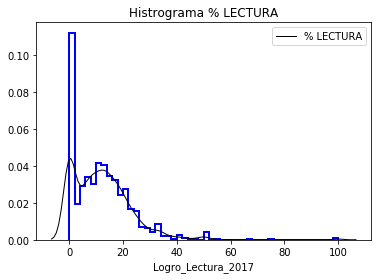

In [5]:
(sns.distplot(arch_["Logro_Lectura_2017"], 
              rug_kws={"color": "y"},
              kde_kws={"color": "k", "lw": 1, 
                       "label": "% LECTURA"},
              hist_kws={"histtype": "step", "linewidth": 2,
                        "alpha":1 , "color": "b"})
.set_title("Histrograma % LECTURA"))
plt.show()

En ambos casos vemos que los valores tienden a ser muy bajos, en lectura vemos dos picos uno en 0 y otro en 12 mientras en matematica definitivamente la tendencia es 0 de nota.
ahora responderemos las preguntas 
-  Que departamento aparte de la capital tiene mejores notas
-  El mismo departamento tendra las mejoras notas en ambas materias?

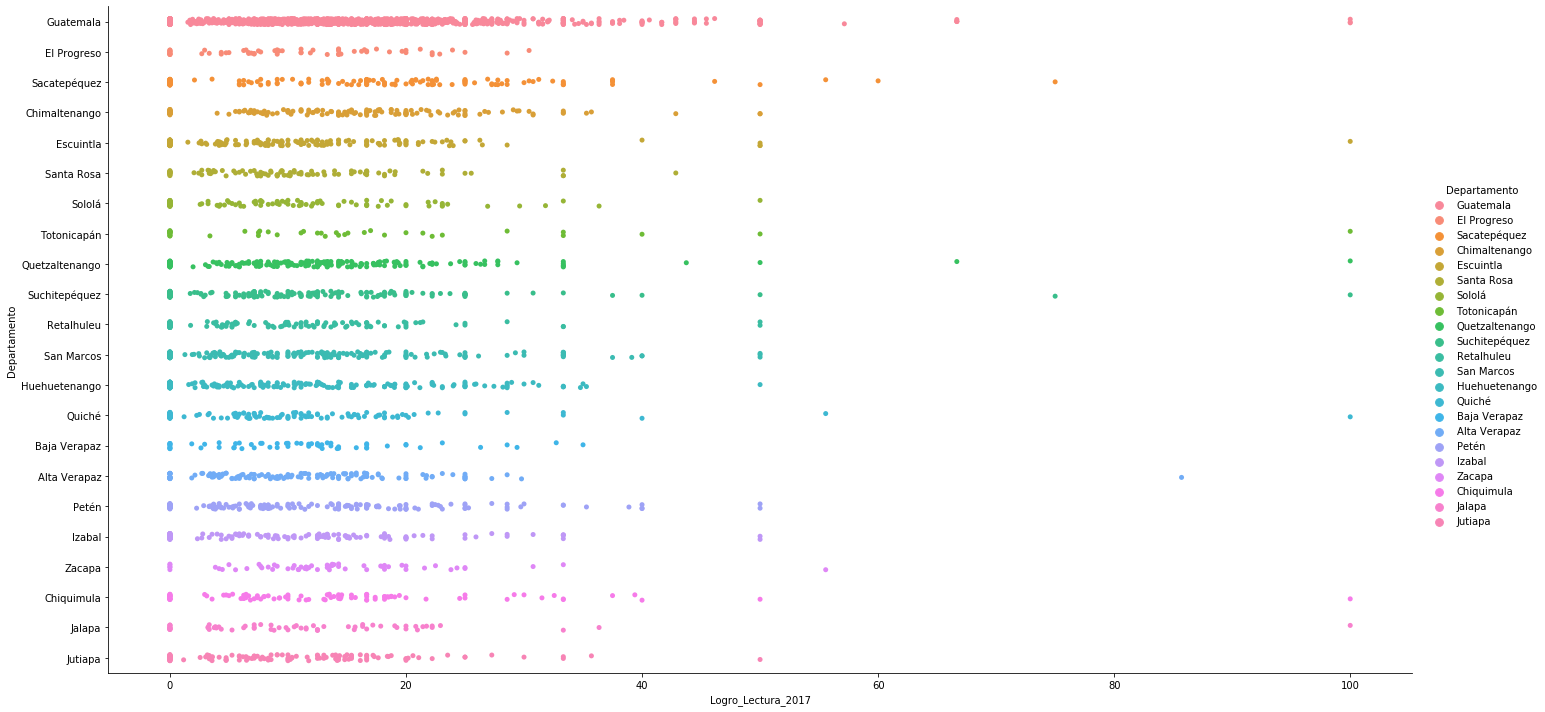

In [6]:
Grafica_2=sns.catplot(x="Logro_Lectura_2017", 
            y="Departamento",
            hue="Departamento" ,
            data=arch_,
            kind="strip",
            height=10,
            aspect=2, );

In [ ]:
Analizamos los departamentos que tienen mejores valores y los analizamos aisladamente

- Quetzaltenango 
- Chimaltenango 
- Sacatepequez

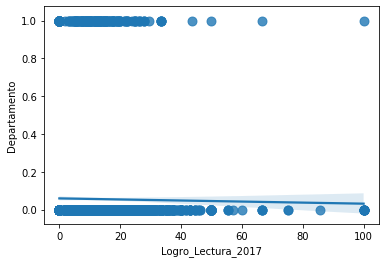

In [10]:
sns.regplot(x="Logro_Lectura_2017",
            y=(arch_["Departamento"] =="Quetzaltenango" ), 
            data=arch_, 
            fit_reg=True, 
            scatter_kws={"s": 80})

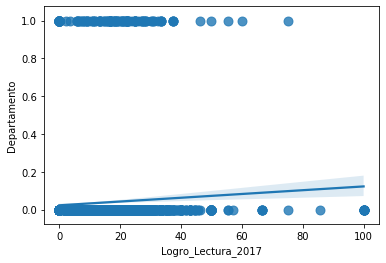

In [9]:
sns.regplot(x="Logro_Lectura_2017",
            y=(arch_["Departamento"] =="Sacatepéquez" ), 
            data=arch_, 
            fit_reg=True, 
            scatter_kws={"s": 80})

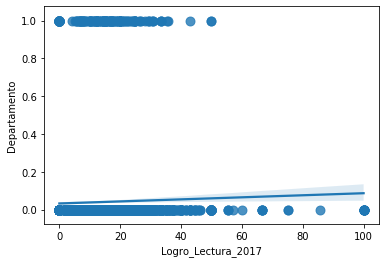

In [8]:
sns.regplot(x="Logro_Lectura_2017",
            y=(arch_["Departamento"] =="Chimaltenango" ), 
            data=arch_, 
            fit_reg=True, 
            scatter_kws={"s": 80})

Graficando ya puntualmente podemos observa que sacatepequez tiene mejor tendencia podemos deducir que SACATEPEQUEZ es el mejor posesionado despues de la capital ahora revisamos la materia de Matematica

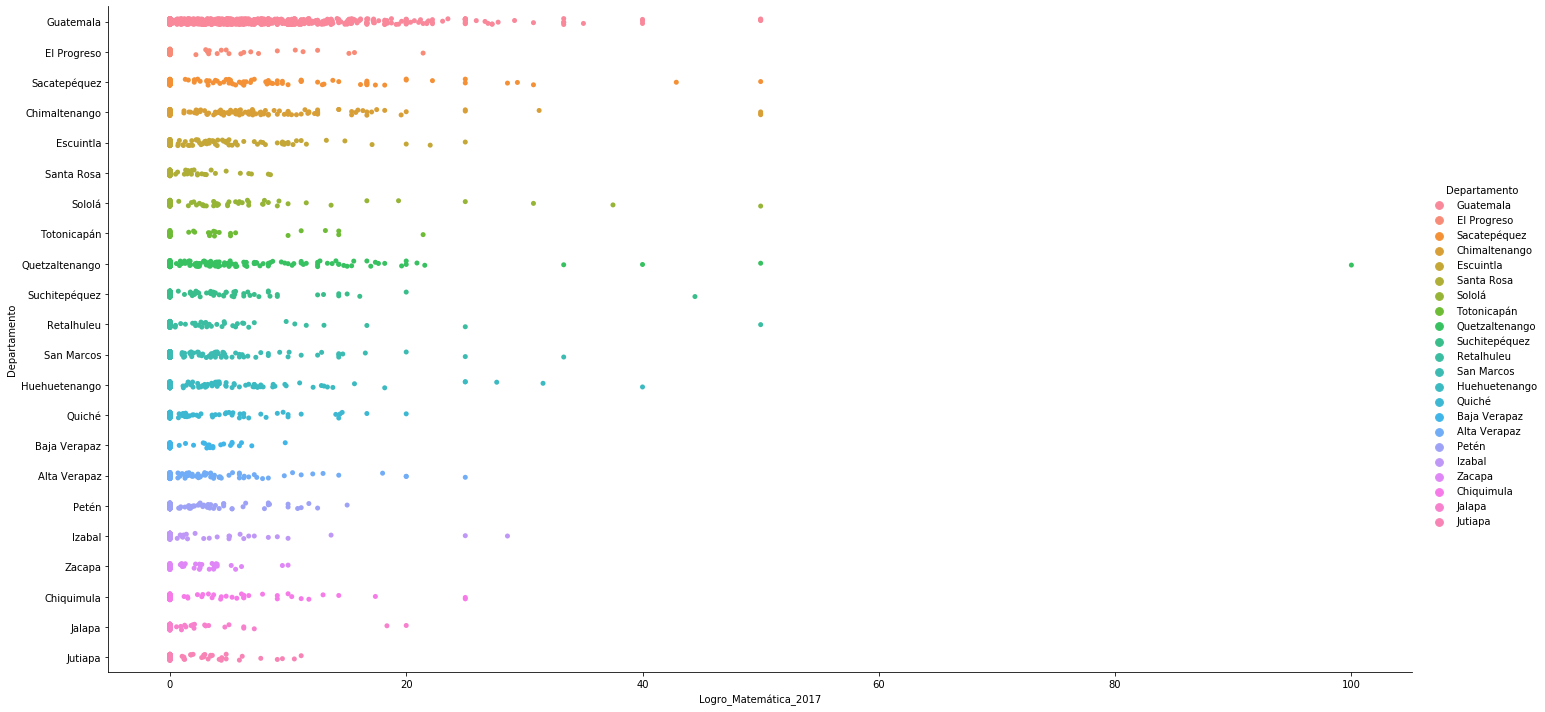

In [7]:
Grafica_3=sns.catplot(x="Logro_Matemática_2017", 
            y="Departamento",
            hue="Departamento" ,
            data=arch_,
            kind="strip",
            height=10,
            aspect=2, );

Hacemos nuevamente el analisis de los departamentos que consideramos mejor posesionados. Seleccionamos dos departamentos que consideramos que tienen mejores valores: 
- Quetzaltenango
- Chimaltenango

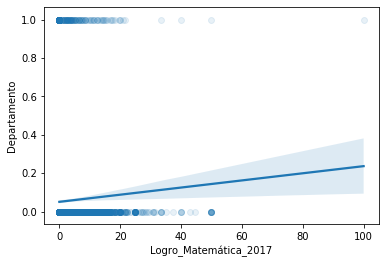

In [11]:
sns.regplot(x="Logro_Matemática_2017",
            y=(arch_["Departamento"] =="Quetzaltenango" ), 
            data=arch_, 
            fit_reg=True, 
            scatter_kws={"alpha": 0.1})

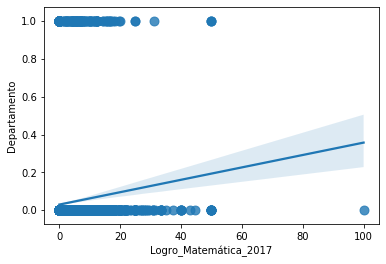

In [12]:
sns.regplot(x="Logro_Matemática_2017",
            y=(arch_["Departamento"] =="Chimaltenango" ), 
            data=arch_, 
            fit_reg=True, 
            scatter_kws={"s": 80})


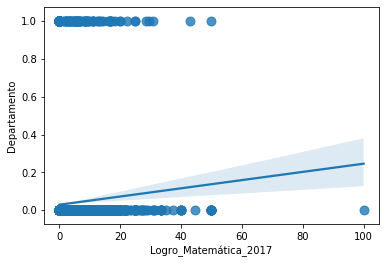

In [13]:
sns.regplot(x="Logro_Matemática_2017",
            y=(arch_["Departamento"] =="Sacatepéquez" ), 
            data=arch_, 
            fit_reg=True, 
            scatter_kws={"s": 80})


Podemos deducir que el departamento que tiene mejores notas en Matematicas es Sacatepéquez

## Con esto resolvemos las preguntas Planteadas

-  Que departamento aparte de la capital tiene mejores notas
        CHIMALTENANGO ES EL SEGUNDO LUGAR EN MATEMATICA
        SACATEPEQUEZ ES EL SEGUNDO LUGAR EN LEGUANJE



-  El mismo departamento tendra las mejoras notas en ambas materias

        NO 
    


Ahora surge otra pregunta, estos departamentos estaran influenciados geograficamente por la cercania con la Capital? 
Realizaremos una regresion lineal por departamento para determinar si hay alguna tendencia.


In [14]:
arch_

,Sector del Establecimiento,Área del establecimiento,Total_Estudiantes,Logro_Lectura_2017,Logro_Matemática_2017,Edad_promedio,Departamento
Código del Establecimiento,,,,,,,
00-01-0158-46,Privado,Urbana,12,41.67,0.00,18.33,Guatemala
00-01-0173-46,Oficial,Urbana,97,27.84,1.03,18.26,Guatemala
00-01-0174-46,Oficial,Urbana,177,16.38,0.56,17.97,Guatemala
00-01-0176-46,Oficial,Urbana,160,23.75,10.00,16.88,Guatemala
00-01-0178-46,Oficial,Urbana,34,2.94,2.94,23.29,Guatemala
...,...,...,...,...,...,...,...
22-17-0015-46,Privado,Urbana,28,7.14,0.00,17.86,Jutiapa
22-17-0016-46,Privado,Urbana,4,25.00,0.00,17.50,Jutiapa
22-17-0019-46,Privado,Urbana,63,3.17,0.00,22.00,Jutiapa


In [16]:
model = sm.OLS.from_formula("Logro_Lectura_2017 ~ Departamento", data=arch_)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Logro_Lectura_2017   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.186
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.41e-25
Time:                        17:32:27   Log-Likelihood:                -15799.
No. Observations:                4124   AIC:                         3.164e+04
Df Residuals:                    4102   BIC:                         3.178e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         10.9383      0.929     11.773      0.000       9.117      12.760
Departamento[T.Baja Verapaz]       0.2358      1.707      0.138      0.890      -3.112       3.583
Departamento[T.Chimaltenango]      3.0895      1.275      2.423      0.015       0.589       5.590
Departamento[T.Chiquimula]         2.8080      1.459      1.925      0.054      -0.052       5.668
Departamento[T.El Progreso]       -0.2193      1.688     -0.130      0.897      -3.529       3.090
Departamento[T.Escuintla]         -1.1843      1.228     -0.964      0.335      -3.592       1.224
Departamento[T.Guatemala]          3.9336      0.981      4.011      0.000       2.011       5.856
Departamento[T.Huehuetenango]     -0.6069      1.207     -0.503      0.615      -2.973       1.759
Departamento[T.Izabal]            -1.8573      1.291     -1.439      0.150      -4.387       0.673
Departamento[T.Jalapa]             0.9471      1.661      0.570      0.569      -2.310       4.204
Departamento[T.Jutiapa]           -1.0000      1.343     -0.744      0.457      -3.633       1.633
Departamento[T.Petén]              0.8367      1.265      0.662      0.508      -1.643       3.316
Departamento[T.Quetzaltenango]     0.6804      1.183      0.575      0.565      -1.640       3.000
Departamento[T.Quiché]            -0.8892      1.363     -0.653      0.514      -3.561       1.782
Departamento[T.Retalhuleu]        -1.5320      1.357     -1.129      0.259      -4.192       1.128
Departamento[T.Sacatepéquez]       4.9541      1.309      3.783      0.000       2.387       7.521
Departamento[T.San Marcos]        -0.9814      1.166     -0.842      0.400      -3.268       1.305
Departamento[T.Santa Rosa]        -0.3947      1.472     -0.268      0.789      -3.281       2.491
Departamento[T.Sololá]            -1.7208      1.418     -1.213      0.225      -4.501       1.060
Departamento[T.Suchitepéquez]     -0.6949      1.224     -0.568      0.570      -3.095       1.705
Departamento[T.Totonicapán]        2.5292      1.926      1.313      0.189      -1.246       6.304
Departamento[T.Zacapa]             2.6905      1.717      1.567      0.117      -0.676       6.057
==============================================================================
Omnibus:                     2028.526   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22099.423
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      13.549   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                    coef 	std err
- Departamento[T.Chimaltenango]  	3.0895 	1.275 	 --> 2.4231
- Departamento[T.Chiquimula] 	    2.8080 	1.459        --> 1.9246
- Departamento[T.Sacatepéquez]   	4.9541 	1.309 	 --> 3.7874

#### siendo la mejor Regresion lineal

### Y=  10.9383 + 4.9541X

In [96]:
arch_.Logro_Matemática_2017.std()

6.120235584533227

In [ ]:
repetimos la prueba con la materia de matematica

In [17]:
model = sm.OLS.from_formula("Logro_Matemática_2017 ~ Departamento", data=arch_)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Logro_Matemática_2017   R-squared:                       0.059
Model:                               OLS   Adj. R-squared:                  0.054
Method:                    Least Squares   F-statistic:                     12.32
Date:                   Sun, 17 May 2020   Prob (F-statistic):           2.18e-41
Time:                           17:32:33   Log-Likelihood:                -13196.
No. Observations:                   4124   AIC:                         2.644e+04
Df Residuals:                       4102   BIC:                         2.658e+04
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.1494      0.494      4.349      0.000       1.180       3.118
Departamento[T.Baja Verapaz]      -0.7830      0.908     -0.862      0.389      -2.564       0.998
Departamento[T.Chimaltenango]      3.9523      0.678      5.826      0.000       2.622       5.282
Departamento[T.Chiquimula]         0.2970      0.776      0.383      0.702      -1.224       1.818
Departamento[T.El Progreso]        0.3170      0.898      0.353      0.724      -1.444       2.078
Departamento[T.Escuintla]         -0.0636      0.653     -0.097      0.923      -1.344       1.217
Departamento[T.Guatemala]          2.1705      0.522      4.161      0.000       1.148       3.193
Departamento[T.Huehuetenango]      0.3602      0.642      0.561      0.575      -0.898       1.619
Departamento[T.Izabal]            -1.1518      0.686     -1.678      0.093      -2.498       0.194
Departamento[T.Jalapa]            -0.7888      0.884     -0.893      0.372      -2.521       0.944
Departamento[T.Jutiapa]           -1.2651      0.715     -1.771      0.077      -2.666       0.136
Departamento[T.Petén]             -0.9154      0.673     -1.361      0.174      -2.234       0.404
Departamento[T.Quetzaltenango]     2.0991      0.629      3.335      0.001       0.865       3.333
Departamento[T.Quiché]            -0.1333      0.725     -0.184      0.854      -1.554       1.288
Departamento[T.Retalhuleu]        -0.3523      0.722     -0.488      0.626      -1.767       1.063
Departamento[T.Sacatepéquez]       3.1457      0.697      4.516      0.000       1.780       4.511
Departamento[T.San Marcos]        -0.5731      0.620     -0.924      0.356      -1.789       0.643
Departamento[T.Santa Rosa]        -1.3572      0.783     -1.733      0.083      -2.892       0.178
Departamento[T.Sololá]             1.2321      0.754      1.633      0.103      -0.247       2.711
Departamento[T.Suchitepéquez]     -0.4603      0.651     -0.707      0.480      -1.737       0.816
Departamento[T.Totonicapán]        0.8343      1.024      0.814      0.415      -1.174       2.842
Departamento[T.Zacapa]            -0.6489      0.914     -0.710      0.478      -2.440       1.142
==============================================================================
Omnibus:                     3612.724   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169767.611
Skew:                           3.994   Prob(JB):                         0.00
Kurtosis:                      33.400   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

Como era de esperar la correlacion es muy baja ya que los datos no estan distribuidos sino se focalizan en valores muy bajos cercanos a 0 haremos el mismo ejercicio con Lenguaje para ver su diferencia.

In [21]:
arch_.Logro_Lectura_2017.std()

11.390439860935398

Comparando las desviaciones obtenidas entre Lenguaje (11.39) y Matematicas (6.12) Claramente pdemos observar que Matematica es la materia que mas estudiantes pierden y que no depende del Departamento donde Estudien.


- Departamento[T.Chimaltenango] 	3.9523 	0.678 	5.8093
- Departamento[T.Quetzaltenango] 	2.0991 	0.629 	3.3372
- Departamento[T.Sacatepéquez] 	3.1457 	0.697 	4.5131


#### siendo la mejor Regresion lineal

### Y=  2.1494 + 3.9523 X

## Concluciones:

- 1. No se logro encontrar una relacion directa entre las notas de lenguaje y matematica con la cercania hacia la capital.
- 2. La capital tiene mejor porcentaje de aprobacion no por lo eficiente de sus estudiantes sino por la cantidad de evaluados





## Anotacion

Por algun motivo los nombres de las columnas muy grandes me daban problemas para realizar la practica de las regresiones. Tuve que modificarlo para que funcionara no toque nada de la data unicamente los nombres de las columnas esto me ocasiono mucho retraso.